# MNIST Handwritten Digit Classification Neural Network

### Objectives:

This notebook performs the following tasks:

1. **Data Loading and Preprocessing**:
   - Loads the MNIST dataset from OpenML, and previews the first few rows of dataset.
   - Splits the dataset into training, validation, and test sets.
   - Scales the features using `StandardScaler` to standardize the input data.

2. **Neural Network Model Creation**:
   - Defines multiple neural network architectures using custom models (`model1`, `model2`, `model3`).
   - Configures each model with a varying number of hidden layers and neurons, using ReLU activation for hidden layers and softmax for classification.

3. **Model Training**:
   - Trains each of the custom neural network models on the scaled training data for 300 epochs.
   - Tracks and visualizes the cost (loss) vs iterations during training for all models using Matplotlib.

4. **Evaluation of Custom Models**:
   - Evaluates the trained models using accuracy and F1 score on the training, validation, and test sets.
   - Prints the accuracy and F1 scores for each model on each dataset (train, validation, and test).

5. **Building the Optimal Model with TensorFlow**:
   - Based on the evaluation of custom models, the best-performing architecture is implemented using TensorFlow’s Keras API (`tf.keras.Sequential`).
   - Configures the model with two hidden layers using ReLU activation and a linear output layer.
   - Compiles the model with the `SparseCategoricalCrossentropy` loss function and applies softmax internally via the `from_logits=True` argument.

6. **Training the TensorFlow Model**:
   - Trains the TensorFlow model for 300 epochs on the scaled training data.
   - Plots iterations (epochs) vs cost (loss) after training.

7. **Prediction and Evaluation on TensorFlow Model**:
   - Uses the trained TensorFlow model to predict labels on the training, validation, and test datasets.
   - Converts the logits from the linear output layer into probabilities using `tf.nn.softmax()`.
   - Uses `argmax` to convert probabilities into class labels.
   - Evaluates the model’s performance on all datasets using accuracy and F1 score.

### This notebook uses the `MNIST dataset of handwritten digits` to build a neural network model that predicts the correct digit label (0-9).


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

# Load the MNIST dataset from OpenML
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"]

In [2]:
# Preview the first few rows of features (X)
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Preview the first few rows of labels (y)
y.head()

,class
0,5
1,0
2,4
3,1
4,9


In [4]:
from sklearn.model_selection import train_test_split

# Convert X and y to numpy arrays for further processing
X = X.values
Y = y.values.astype(int).reshape(-1, 1)

# First split: Train + Validation and Test sets (70% for training/validation, 30% for test)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# Second split: Training and Validation sets (70% of train_val data for training, 30% for validation)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.3, random_state=42, stratify=Y_train_val)

# Output the shapes of the data splits for verification
print("Training set shape:", X_train.shape, Y_train.shape)
print("Validation set shape:", X_val.shape, Y_val.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (34300, 784) (34300, 1)
Validation set shape: (14700, 784) (14700, 1)
Testing set shape: (21000, 784) (21000, 1)


In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler to scale the feature data
scaler = StandardScaler()

# Fit the scaler on the training data and transform it (normalization/standardization)
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the validation and test data (same scaling for consistency)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [10]:
import nn_base

# Custom neural network models (these are hypothetical models defined in nn_base)
model1 = nn_base.NeuralNetworkModel()
model2 = nn_base.NeuralNetworkModel()
model3 = nn_base.NeuralNetworkModel()

# Define model1 architecture with 1 hidden layer (20 units) and output layer with softmax
model1.sequential([
    model1.layer(units=20, activation="relu"),
    model1.layer(units=10, activation="softmax"),
])

# Define model2 architecture with 2 hidden layers (30, 20 units) and output layer with softmax
model2.sequential([
    model2.layer(units=30, activation="relu"),
    model2.layer(units=20, activation="relu"),
    model2.layer(units=10, activation="softmax"),
])

# Define model3 architecture with 3 hidden layers (40, 30, 20 units) and output layer with softmax
model3.sequential([
    model3.layer(units=40, activation="relu"),
    model3.layer(units=30, activation="relu"),
    model3.layer(units=20, activation="relu"),
    model3.layer(units=10, activation="softmax"),
])

In [11]:
# List to store all the models
models = [model1, model2, model3]

# Train each custom model and track its progress
for i, model in enumerate(models):
    print(f"\nTraining Model_{i+1}:\n")
    model.fit(X_train_scaled, Y_train, epochs=300, alpha=3) # Train the model for 300 epochs


Training Model_1:

Epoch: 1/300
cost = 2.97345239824084
Epoch: 2/300
cost = 1.8536538985449977
Epoch: 3/300
cost = 1.2600458003536945
Epoch: 4/300
cost = 0.9488917158383492
Epoch: 5/300
cost = 0.7437500294930687
Epoch: 6/300
cost = 0.7020029959414847
Epoch: 7/300
cost = 0.6467485064598401
Epoch: 8/300
cost = 0.6077898211599667
Epoch: 9/300
cost = 0.576577144860016
Epoch: 10/300
cost = 0.5364610783208695
Epoch: 11/300
cost = 0.531978021533619
Epoch: 12/300
cost = 0.5079322016903614
Epoch: 13/300
cost = 0.4690141913403598
Epoch: 14/300
cost = 0.4513103134570487
Epoch: 15/300
cost = 0.41717358002216126
Epoch: 16/300
cost = 0.40784837464527973
Epoch: 17/300
cost = 0.3984222333109937
Epoch: 18/300
cost = 0.3823347830484216
Epoch: 19/300
cost = 0.3735335178728339
Epoch: 20/300
cost = 0.35966438100697357
Epoch: 21/300
cost = 0.33317655275023117
Epoch: 22/300
cost = 0.3215301724705224
Epoch: 23/300
cost = 0.30872640249696337
Epoch: 24/300
cost = 0.29479342675325676
Epoch: 25/300
cost = 0.2877

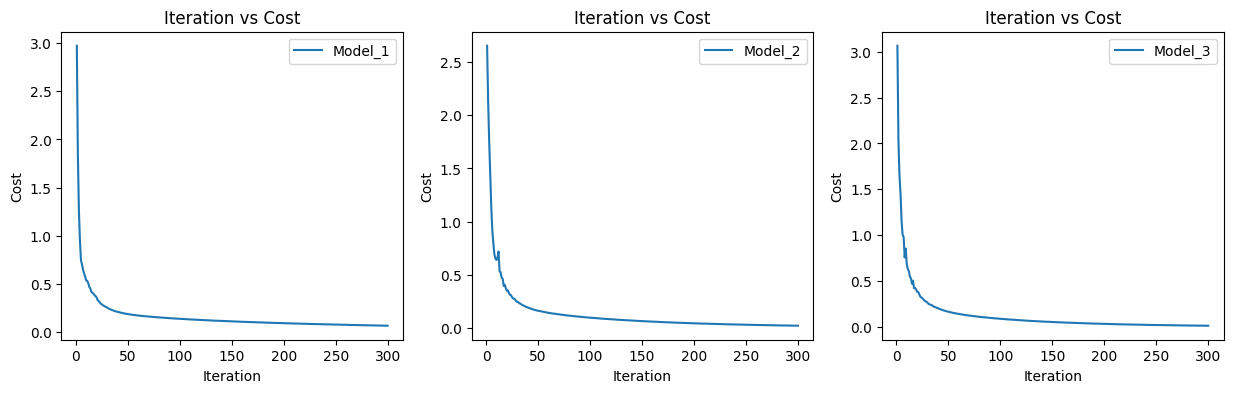

In [12]:
import matplotlib.pyplot as plt

# Plot iteration vs cost (loss) for each model
_, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, model in enumerate(models):
    cost_hist = np.array(model.cost_history)  # Retrieve cost history
    ax[i].plot(cost_hist[:, 0], cost_hist[:, 1], label=f"Model_{i+1}")  # Plot iteration vs cost
    ax[i].set_title("Iteration vs Cost")
    ax[i].set_xlabel("Iteration")
    ax[i].set_ylabel("Cost")
    ax[i].legend()

All three models show a rapid decrease in **cost** during the initial iterations, indicating effective training, and reflecting successful minimization of the **loss function**.

In [13]:
from sklearn.metrics import accuracy_score, f1_score

# Evaluate accuracy and F1 score on train and validation sets for each model
for i, model in enumerate(models):
    # Make predictions on the training and validation sets
    Y_hat_train = np.argmax(model.predict(X_train_scaled), axis=1, keepdims=True)
    Y_hat_val = np.argmax(model.predict(X_val_scaled), axis=1, keepdims=True)

    # Compute accuracy
    train_accuracy = accuracy_score(Y_train, Y_hat_train)
    val_accuracy = accuracy_score(Y_val, Y_hat_val)
    print(f"Model_{i+1} Train accuracy: {train_accuracy}, Model_{i+1} Val accuracy: {val_accuracy}")

    # Compute F1 score
    train_f1 = f1_score(Y_train, Y_hat_train, average="weighted")
    val_f1 = f1_score(Y_val, Y_hat_val, average="weighted")
    print(f"Model_{i+1} Train f1 score: {train_f1}, Model_{i+1} Val f1 score: {val_f1}\n")

Model_1 Train accuracy: 0.9828862973760933, Model_1 Val accuracy: 0.9425170068027211
Model_1 Train f1 score: 0.9828815968903449, Model_1 Val f1 score: 0.9424468448808451

Model_2 Train accuracy: 0.9964139941690963, Model_2 Val accuracy: 0.9471428571428572
Model_2 Train f1 score: 0.9964144374132472, Model_2 Val f1 score: 0.9471401861860138

Model_3 Train accuracy: 0.9974927113702624, Model_3 Val accuracy: 0.9523809523809523
Model_3 Train f1 score: 0.9974930447777863, Model_3 Val f1 score: 0.9523713628226722



Among the evaluated neural network models, **Model_3** emerges as the best performer. It achieves an impressive **training accuracy** of **99.75%** and a **validation accuracy** of **95.24%**. Additionally, it records a **training F1 score** of **99.75%** and a **validation F1 score** of **95.24%**. **Model_2** also performs well with a **training accuracy** of **99.64%** and a **validation accuracy** of **94.71%**, while **Model_1**, despite having a simpler architecture, achieves a respectable **training accuracy** of **98.29%** and a **validation accuracy** of **94.25%**. While all models demonstrate strong performance, **Model_3**'s superior metrics make it the most effective choice for our task. Now it's time to test the optimal model on test set, but for intuition we will evaluate all models on the testing set.

In [15]:
# Evaluate the custom models on the test set
for i, model in enumerate(models):
    # Make predictions on the test set
    Y_hat_test = np.argmax(model.predict(X_test_scaled), axis=1, keepdims=True)

    # Compute accuracy
    test_accuracy = accuracy_score(Y_test, Y_hat_test)
    print(f"Model_{i+1} Test accuracy: {test_accuracy}")

    # Compute F1 score
    test_f1 = f1_score(Y_test, Y_hat_test, average="weighted")
    print(f"Model_{i+1} Test f1 score: {test_f1}\n")

Model_1 Test accuracy: 0.9421904761904762
Model_1 Test f1 score: 0.942104661768477

Model_2 Test accuracy: 0.9473809523809524
Model_2 Test f1 score: 0.9473496303216566

Model_3 Test accuracy: 0.949952380952381
Model_3 Test f1 score: 0.9499062705300603



The testing results highlight the effectiveness of **Model_3** as the optimal choice. With a **test accuracy** of **95.00%** and a **test F1 score** of **95.00%**, **Model_3** outperforms the other models, showcasing its superior capabilities during the testing phase. **Model_2** follows closely with a **test accuracy** of **94.74%** and a **test F1 score** of **94.74%**. Meanwhile, **Model_1** achieves a **test accuracy** of **94.22%** and a **test F1 score** of **94.21%**. While all models demonstrate strong performance, **Model_3**'s metrics confirm it as the most effective model for the given dataset.

In [16]:
import tensorflow as tf

# Define the optimal model architecture using TensorFlow based on the evaluation of custom models
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer with the feature size
    tf.keras.layers.Dense(40, activation="relu"),  # First hidden layer
    tf.keras.layers.Dense(30, activation="relu"),  # Second hidden layer
    tf.keras.layers.Dense(20, activation="relu"),  # Third hidden layer
    tf.keras.layers.Dense(10, activation="linear")  # Output layer with linear activation (logits)
])

# Compile the TensorFlow model with Adam optimizer and SparseCategoricalCrossentropy loss
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)  # Specify softmax in loss
)

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 40)                  │          31,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           1,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,460 (130.70 KB)

 Trainable params: 33,460 (130.70 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the TensorFlow model
history = model.fit(X_train_scaled, Y_train,
                    epochs=300,  # Train for 300 epochs
                    batch_size=1000)  # Use a batch size of 1000 samples

Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 1.0957
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2184
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1403
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1035
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0883
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0687
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0632
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0566
Epoch 9/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0481
Epoch 10/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0456
Epoch 11/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0459
Epoch 12/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0390
Epoch 13/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0388
Epoch 14/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0309
Epoch 15/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0334
Epo

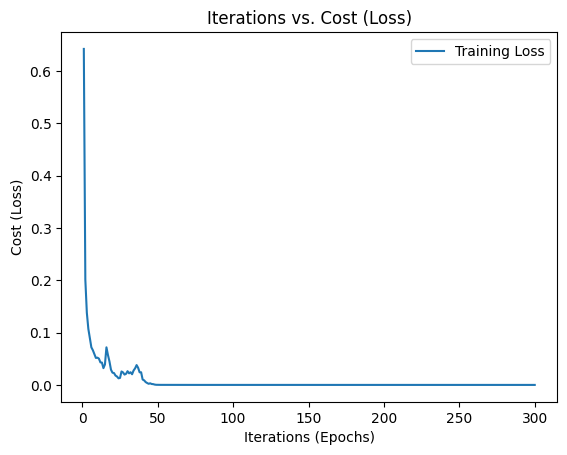

In [18]:
# Get the loss values from the training process
train_loss = history.history["loss"]  # Training loss for each epoch

# Plot iteration (epochs) vs cost (loss)
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss")
plt.title("Iterations vs. Cost (Loss)")
plt.xlabel("Iterations (Epochs)")
plt.ylabel("Cost (Loss)")
plt.legend()

The **TensorFlow model's training loss** shows a sharp decline in the initial epochs, indicating efficient learning early on. By around **50 epochs**, the loss stabilizes close to zero, demonstrating that the model has effectively minimized the error and converged to an optimal solution during training.


In [19]:
# Create a list of datasets for predictions (train, validation, test)
all_data = [("Train", X_train_scaled, Y_train), ("Val", X_val_scaled, Y_val), ("Test", X_test_scaled, Y_test)]

# Predict and evaluate accuracy and F1 score for each dataset (train, validation, test)
for data in all_data:
    # Predict using the model (logits will be returned due to linear activation)
    logits = model.predict(data[1])

    # Apply softmax to convert logits to probabilities
    probabilities = tf.nn.softmax(logits, axis=1)

    # Use argmax to get the predicted class labels (highest probability)
    predicted_classes = np.argmax(probabilities, axis=1).reshape(-1, 1)

    # Compute accuracy for each dataset
    accuracy = accuracy_score(predicted_classes, data[2])
    print(f"{data[0]} accuracy: {accuracy}")

    # Compute F1 score for each dataset
    f1 = f1_score(predicted_classes, data[2], average="weighted")
    print(f"{data[0]} f1 score: {f1}\n")

1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Train accuracy: 1.0
Train f1 score: 1.0

460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Val accuracy: 0.9636734693877551
Val f1 score: 0.9636737067049463

657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test accuracy: 0.9628095238095238
Test f1 score: 0.9628326626197176



In comparing the results of **Model_3** with the TensorFlow model, we observe that both models deliver strong performance, but with notable differences. **Model_3** achieves a **train accuracy** of **99.75%** and a **train F1 score** of **99.75%**. Its **validation accuracy** stands at **95.24%** with a **validation F1 score** of **95.24%**, while the **test accuracy** is **95.00%** and the **test F1 score** is **95.00%**. In contrast, the TensorFlow model boasts a perfect **train accuracy** and **train F1 score** of **100%**. Having **validation accuracy** at **96.37%** and **test accuracy** at **96.28%** with corresponding F1 scores. Although **Model_3** performs well, the TensorFlow model shows slightly better metrics, highlighting its effectiveness across all stages of evaluation.

With these insights, we conclude our project successfully. Both models have demonstrated their effectiveness, but the TensorFlow model provides a marginal edge in overall performance.